# M2S13. 04: Not cluster-based cell annotation

## 04.1. Library and files loading

In [11]:
library(Seurat)
library(dplyr)

In [12]:
seurat_obj <- readRDS("01_seurat_obj.Rds")

In [13]:
seurat_obj

An object of class Seurat 
40537 features across 3567 samples within 2 assays 
Active assay: SCT (19819 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

## 04.2. Module score-based annotation

In [14]:
cns_markers <- list(
  Astrocytes = c("GFAP", "AQP4", "ALDH1L1", "S100B", "SLC1A3"),
  Astrocytes_Protoplasmic = c("SLC1A2", "ALDH1L1", "GFAP"),
  Astrocytes_Fibrous = c("GFAP", "VIM", "CD44"),
  Oligodendrocyte_Precursors = c("PDGFRA", "CSPG4"),
  Oligodendrocytes_Mature = c("MBP", "MOG", "PLP1"),
  Neurons_Excitatory = c("SLC17A7", "CAMK2A", "GRIN1"),
  Neurons_Inhibitory = c("GAD1", "GAD2", "SLC32A1"),
  Microglia = c("CX3CR1", "P2RY12", "TMEM119", "ITGAM"))

seurat_obj <- AddModuleScore(object = seurat_obj,
  features = cns_markers,
  name = "CNS_Score"
)

score_columns <- grep("CNS_Score", colnames(seurat_obj@meta.data), value = TRUE)
seurat_obj@meta.data$assigned_celltype <- factor(apply(seurat_obj@meta.data[, score_columns], 1, function(x) names(cns_markers)[which.max(x)]))

In [17]:
cluster_markers <- FindAllMarkers(
    seurat_obj, only.pos = TRUE,
    min.pct = 0.25, logfc.threshold = 0.25,
    group.by = "seurat_clusters"
)

celltype_markers <- FindAllMarkers(
    seurat_obj, only.pos = TRUE,
    min.pct = 0.25, logfc.threshold = 0.25,
    group.by = "assigned_celltype"
)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster Astrocytes

Calculating cluster Astrocytes_Fibrous

Calculating cluster Astrocytes_Protoplasmic

Calculating cluster Microglia

Calculating cluster Neurons_Excitatory

Calculating cluster Neurons_Inhibitory

Calculating cluster Oligodendrocyte_Precursors

Calculating cluster Oligodendrocytes_Mature



In [24]:
celltype_markers %>% mutate(pct_diff = pct.1 - pct.2) %>% filter(p_val_adj < 0.05, avg_log2FC > 1, pct_diff > 0.3) %>% filter(cluster == "Astrocytes")

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,pct_diff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>
AQP4,3.238089e-189,3.239454,0.810,0.177,6.417568e-185,Astrocytes,AQP4,0.633
C1orf61,1.068011e-104,2.680947,0.844,0.412,2.116691e-100,Astrocytes,C1orf61,0.432
SOX9,1.700085e-103,2.292497,0.746,0.244,3.369398e-99,Astrocytes,SOX9,0.502
S100B,2.292468e-92,2.246992,0.876,0.462,4.543442e-88,Astrocytes,S100B,0.414
ATP1B2,9.188034e-89,1.977674,0.810,0.352,1.820976e-84,Astrocytes,ATP1B2,0.458
GJA1,3.089719e-85,2.982226,0.563,0.156,6.123515e-81,Astrocytes,GJA1,0.407
ALDH1L1,1.856206e-84,2.319808,0.540,0.141,3.678814e-80,Astrocytes,ALDH1L1,0.399
PON2,2.044195e-78,2.211136,0.804,0.447,4.051390e-74,Astrocytes,PON2,0.357
BCAN,4.319393e-78,1.570889,0.799,0.319,8.560604e-74,Astrocytes,BCAN,0.480


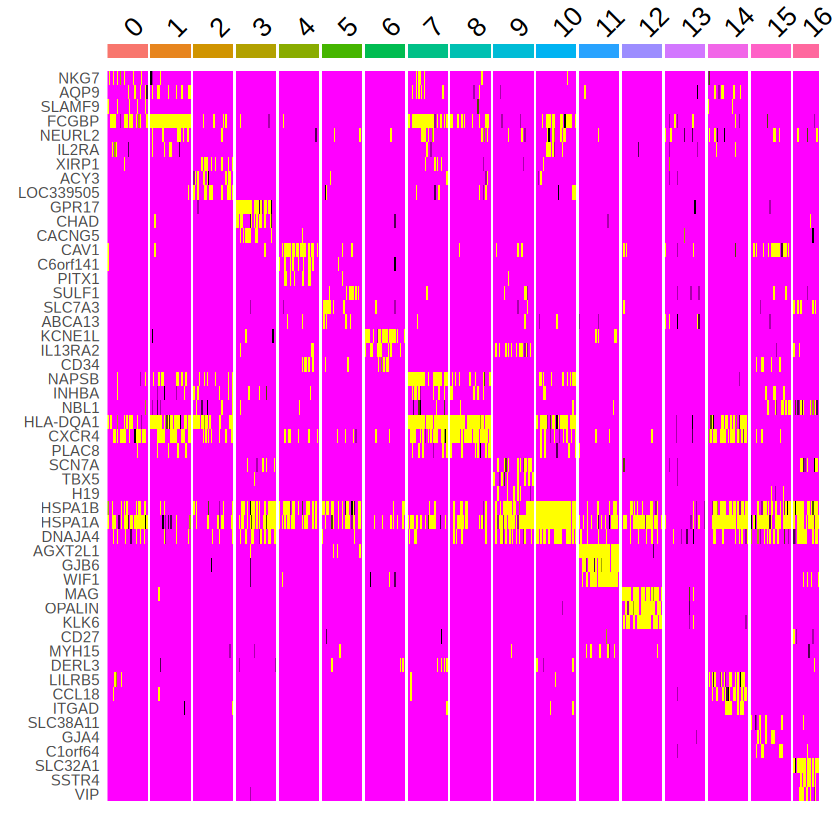

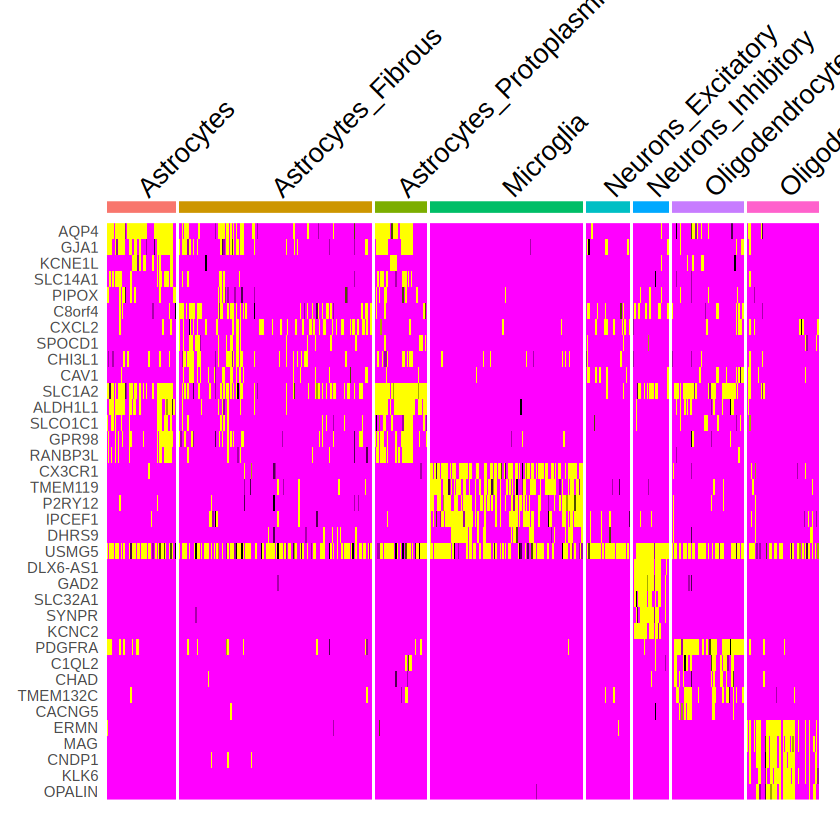

In [25]:
top5_clusters <- cluster_markers %>% group_by(cluster) %>% filter(p_val_adj < 0.05, avg_log2FC > 1) %>% top_n(n = 3, wt = avg_log2FC) 
top5_celltypes <- celltype_markers %>% group_by(cluster) %>% filter(p_val_adj < 0.05, avg_log2FC > 1)  %>% top_n(n = 5, wt = avg_log2FC)

DoHeatmap(subset(seurat_obj, downsample = 30), features = top5_clusters$gene, assay = "RNA", slot = "counts") + NoLegend()
DoHeatmap(subset(seurat_obj, downsample = 30), features = top5_celltypes$gene, group.by = "assigned_celltype", assay = "RNA", slot = "counts") + NoLegend()

In [30]:
seurat_obj@meta.data <- seurat_obj@meta.data %>% mutate(condition_celltype = paste0(Location, "_", assigned_celltype))

In [31]:
unique(seurat_obj@meta.data$condition_celltype)

[1] "Tumor_Astrocytes_Fibrous"            
 [2] "Tumor_Oligodendrocytes_Mature"       
 [3] "Tumor_Astrocytes"                    
 [4] "Tumor_Astrocytes_Protoplasmic"       
 [5] "Tumor_Microglia"                     
 [6] "Tumor_Neurons_Inhibitory"            
 [7] "Tumor_Oligodendrocyte_Precursors"    
 [8] "Tumor_Neurons_Excitatory"            
 [9] "Periphery_Microglia"                 
[10] "Periphery_Astrocytes"                
[11] "Periphery_Oligodendrocytes_Mature"   
[12] "Periphery_Neurons_Excitatory"        
[13] "Periphery_Neurons_Inhibitory"        
[14] "Periphery_Oligodendrocyte_Precursors"
[15] "Periphery_Astrocytes_Fibrous"        
[16] "Periphery_Astrocytes_Protoplasmic"   
[17] "Distant_Microglia"                   
[18] "Distant_Astrocytes"                  
[19] "Distant_Neurons_Excitatory"          
[20] "Distant_Oligodendrocytes_Mature"

In [33]:
Idents(seurat_obj) <- seurat_obj@meta.data$condition_celltype

In [35]:
markers_astrocytes <- FindMarkers(seurat_obj, ident.1 = "Tumor_Astrocytes_Fibrous", ident.2 = "Periphery_Astrocytes_Fibrous")

In [38]:
markers_astrocytes %>% filter(abs(avg_log2FC) > 0.5, p_val_adj < 0.05) %>% arrange(avg_log2FC)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
UNQ6494,3.700291e-07,-8.805206,0.001,0.042,7.333606e-03
SERPINB2,6.329313e-14,-8.416164,0.006,0.125,1.254407e-09
HNRNPKP3,2.645443e-11,-7.805206,0.001,0.062,5.243004e-07
MIR4480,3.648630e-07,-7.738092,0.001,0.042,7.231220e-03
SEMA3D,1.207155e-09,-6.766811,0.004,0.083,2.392461e-05
PADI4,1.325620e-07,-6.491754,0.003,0.062,2.627247e-03
LGALS2,1.276577e-09,-6.365674,0.011,0.125,2.530049e-05
MIR4736,1.807205e-10,-5.930737,0.000,0.042,3.581700e-06
MKX,1.381372e-07,-5.579265,0.003,0.062,2.737742e-03
